# Solving Brio Labyrinth with a Neural Network
*Written by Tobias ?, Vinojan ?, Avi SZYCHTER*

This notebook describes the neural network that we created in order to solve the brio labyrinth situation.

# Dependencies

In [52]:
# Keras
from keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, BatchNormalization, Input
from keras import backend as K
import keras

# Other dependencies
import numpy as np
from read_dataset import load_dataset

import matplotlib.pyplot as plt
%matplotlib inline

# Initialization

# Load the dataset

Loading  whole/white/fromCenter/laby_white_0.bmp
Loading  whole/white/fromCenter/laby_white_1.bmp
Loading  whole/white/fromCenter/laby_white_2.bmp
Loading  whole/white/fromCenter/laby_white_3.bmp
Loading  whole/white/fromCenter/laby_white_4.bmp
Loading  whole/white/fromCenter/laby_white_5.bmp
Loading  whole/white/fromCenter/laby_white_6.bmp
Loading  whole/white/fromCenter/laby_white_7.bmp
Loading  whole/white/fromCenter/laby_white_8.bmp
Loading  whole/white/fromCenter/laby_white_9.bmp
Loading  whole/white/fromCenter/laby_white_10.bmp
Loading  whole/white/fromCenter/laby_white_11.bmp
Loading  whole/white/fromCenter/laby_white_12.bmp
Loading  whole/white/fromCenter/laby_white_13.bmp
Loading  whole/white/fromCenter/laby_white_14.bmp
Loading  whole/white/fromCenter/laby_white_15.bmp
Loading  whole/white/fromCenter/laby_white_16.bmp
Loading  whole/white/fromCenter/laby_white_17.bmp
Loading  whole/white/fromCenter/laby_white_18.bmp
Loading  whole/white/fromCenter/laby_white_19.bmp
Loading  w

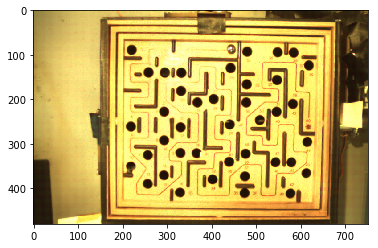

In [53]:
# -- Retrieve the dataset

path = 'Annotated Datasets\\' # Configure to fit your file structure 
datasetFile = 'Annotated Datasets\\whole_white_fromCenter.txt' # Configure to fit your file structure


x, y = load_dataset(datasetFile, path)

input_shape = x[0].shape

x_train, x_test = x[:90], x[90:]
y_train, y_test = y[:90], y[90:]

print("\n\n")
print("Sample image, shape: ", x_train[0].shape)
plt.imshow(x_train[0])


In the following cell, we initialize the neural network model and session. When this is done, we also load the dataset and initialize the InceptionV3 model. Because we are allowed to feed images with any input size, we decided not to resize the images from the dataset (probably because the InceptionV3 is gonna do it anyway).

In [54]:
# -- Initiliaze the tensorflow session and model
model = None

# -- Proposed to be necessary for running keras in jupyter
session = K.get_session()
if model is not None:
    model.reset_states()

# --  Instantiating the inception network 
inception = InceptionV3(include_top=False,weights='imagenet',input_tensor=None,input_shape=(480, 752, 3),pooling='avg')

for layer in inception.layers:
    layer.trainable = False # Make the InceptionV3 network not trainable (because it is pretrained)


# Defining the neural network

## Preprocessing

In [55]:
# TODO: Normalize images
x_train = x_train.astype("float32") / 255
x_test  = x_test.astype("float32") / 255
y_train = y_train.astype("float32") / 255
y_test  = y_test.astype("float32") / 255

## CNN + FNN

The implemented architecture has the following shape:

* Input layer
* InceptionV3
* Output layer (2, linear activation function)


In [57]:
# -- Adding a fully connected output layer with 2 units on top of the InceptionV3 network
inputs = Input(shape=input_shape)
layer = inception(inputs)
layer = Dense(2,activation='linear')(layer)

# -- Defining the Model object
model = Model(inputs=inputs, outputs=layer)

Now we can get a summary of the network if we want to see it

In [63]:
lookAtTheSummary = True # Boolean variable so we can desactivate this log when needed
lookAtTensorBoard = True
if lookAtTheSummary: print(model.summary())
if lookAtTensorBoard: 
    keras.callbacks.TensorBoard(
        log_dir='./logs', 
        histogram_freq=0,
        batch_size=32, 
        write_graph=True, 
        write_grads=False, 
        write_images=False, 
        embeddings_freq=0, 
        embeddings_layer_names=None, 
        embeddings_metadata=None
    )
    
print("Number of trainable parameters: ", int( np.sum( [K.count_params(p) for p in set(model.trainable_weights)] ) ) )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 480, 752, 3)       0         
_________________________________________________________________
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 4098      
Total params: 21,806,882
Trainable params: 4,098
Non-trainable params: 21,802,784
_________________________________________________________________
None
Number of trainable parameters:  4098


If we are satisfied with the model, we can now compile it and fit it

In [59]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

train_history = model.fit(x_train, y_train, epochs=2)
print(train_history.history)

Epoch 1/2
90/90 [==============================] - 121s - loss: 20.3987 - acc: 0.7444    
Epoch 2/2
90/90 [==============================] - 120s - loss: 20.5750 - acc: 0.7444    
{'loss': [20.398695924546985, 20.57497673034668], 'acc': [0.74444444709353974, 0.74444444179534908]}


# Analysis

## Show ROI

50/50 [==============================] - 76s     
Score:  [4.0732630157470702, 0.39999999761581423]


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


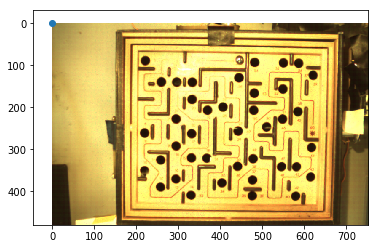

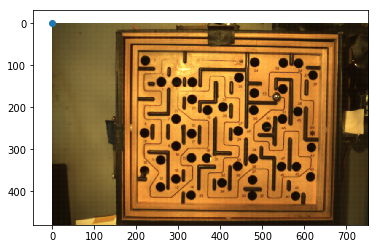

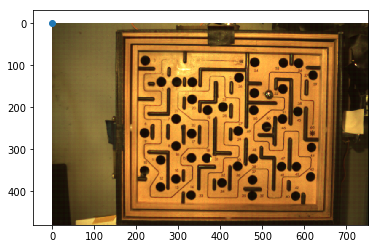

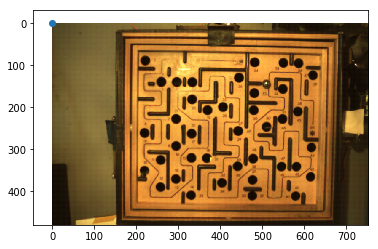

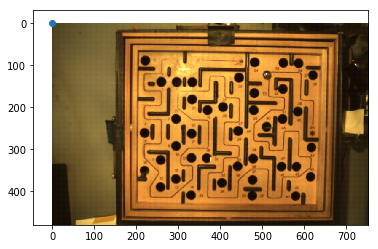

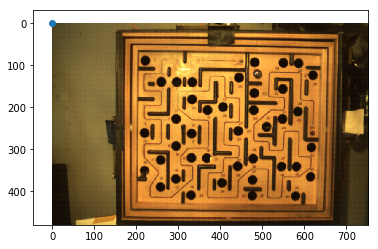

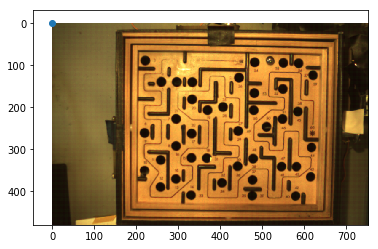

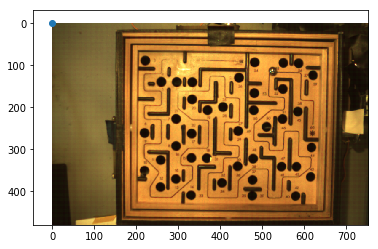

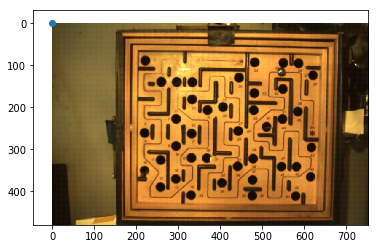

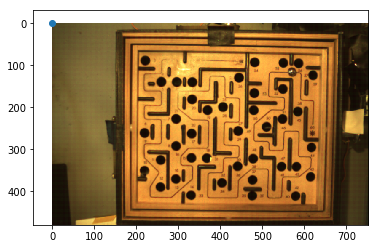

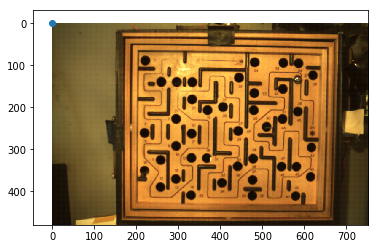

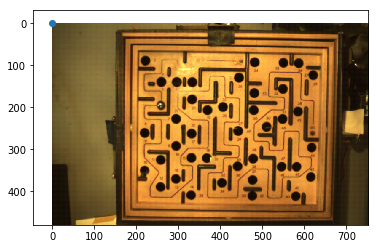

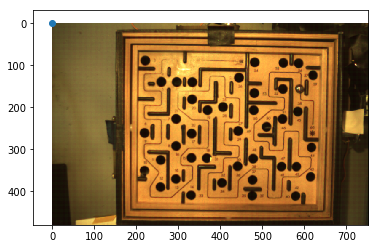

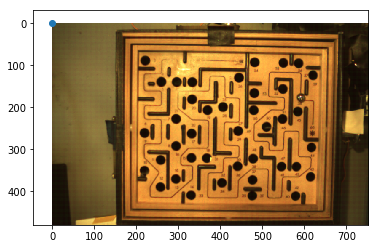

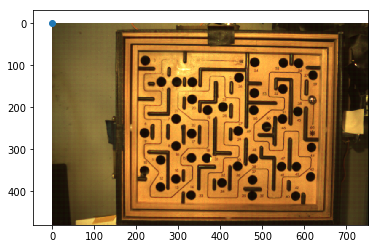

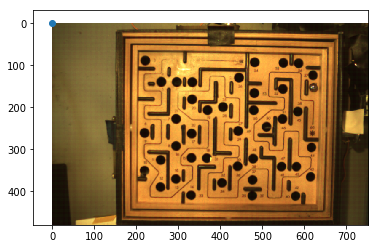

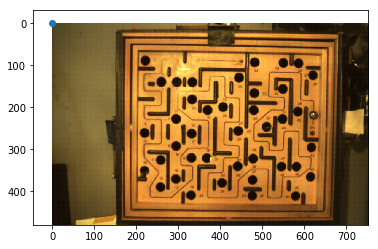

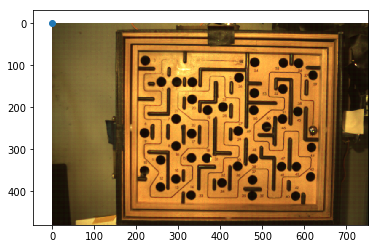

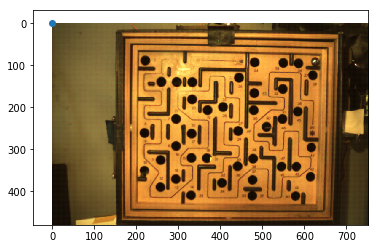

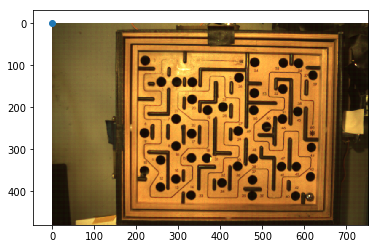

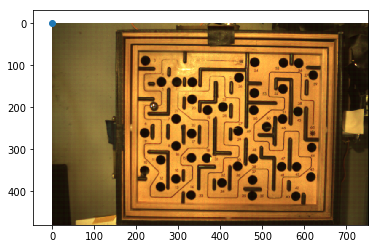

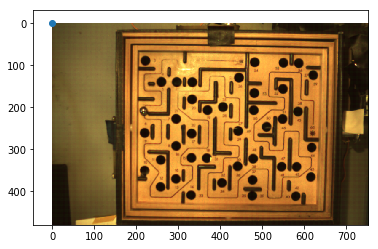

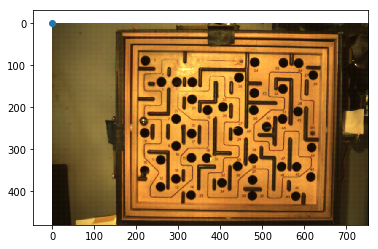

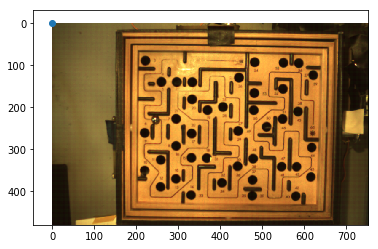

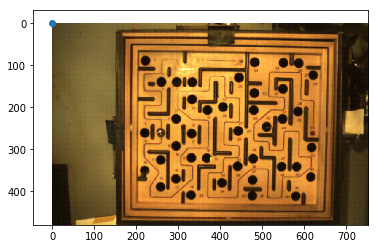

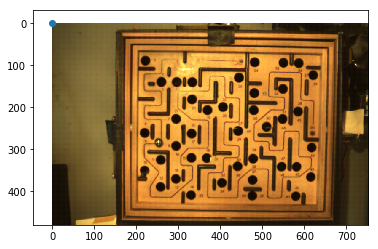

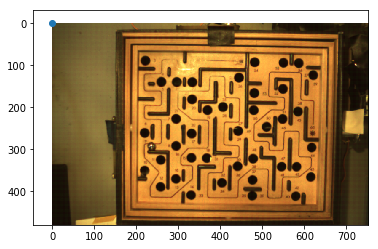

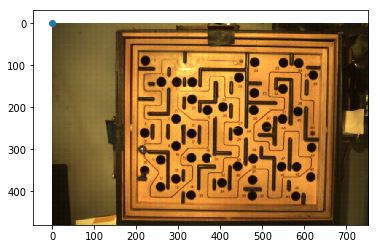

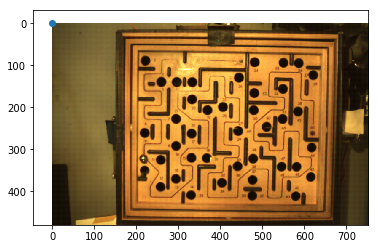

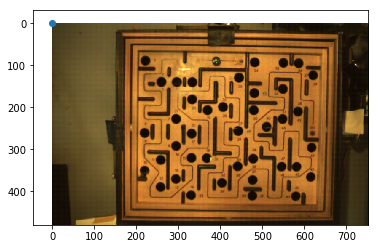

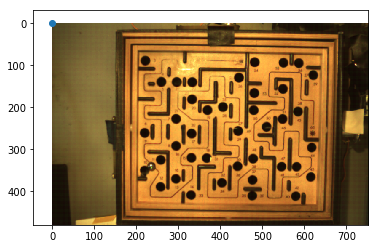

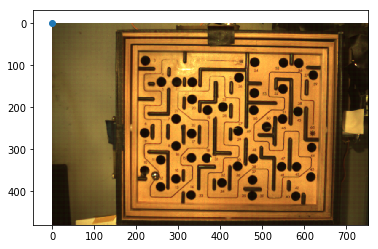

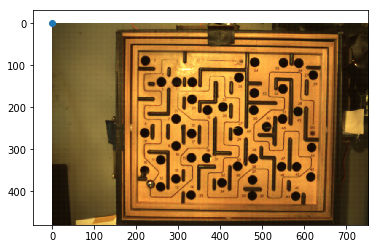

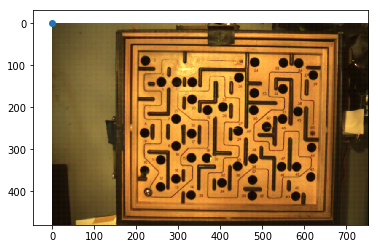

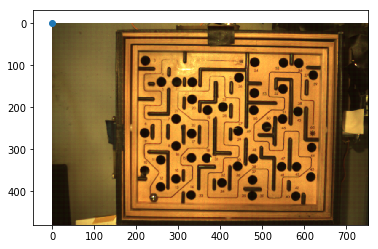

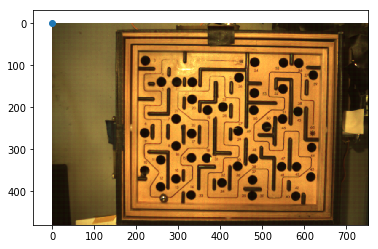

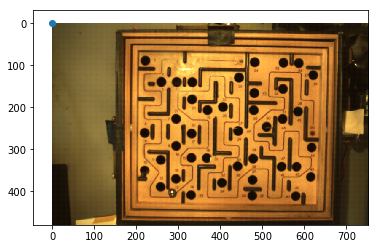

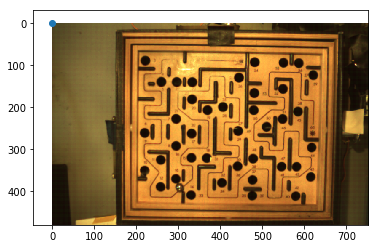

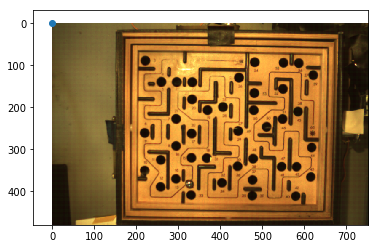

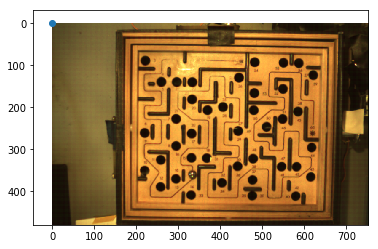

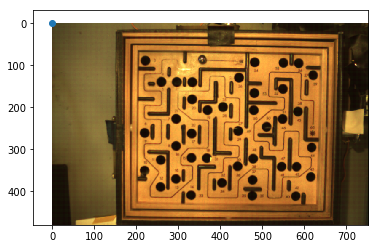

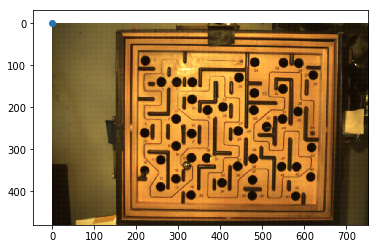

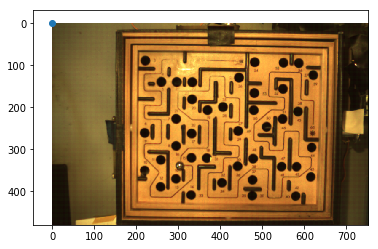

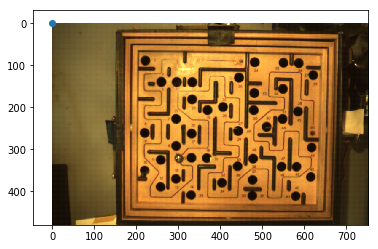

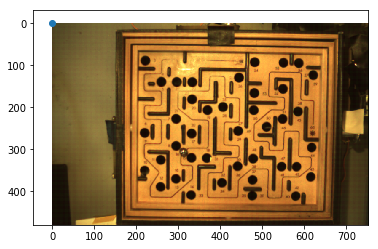

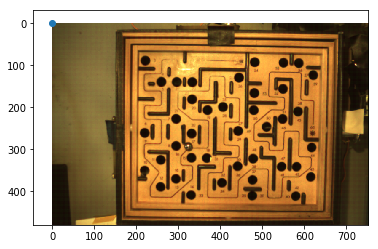

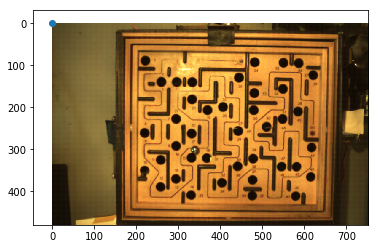

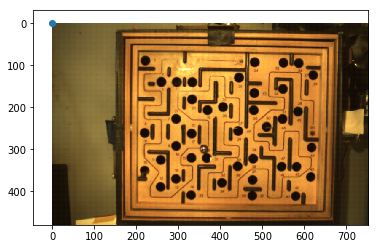

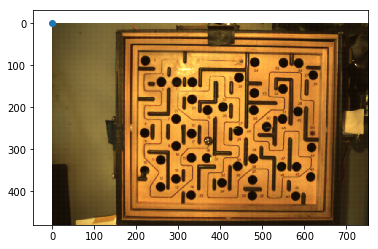

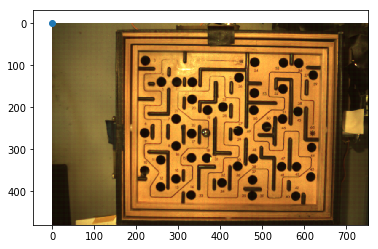

In [60]:
output = model.predict(x_train[0:50])
score  = model.evaluate(x_train[0:50], y_train[0:50])

for img, result in zip(x_train[0:50], output):
    plt.figure()
    plt.imshow(img)
    plt.scatter(result[0], result[1])